In [1]:
# OBTENER LOS DATOS
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', shuffle=True, download_if_missing=True) # Descargamos el dataset de entrenamiento
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, download_if_missing=True) # Descargamos el dataset de test

In [2]:
# TEXTO A NUMEROS

# Extraemos las características de los archivos de texto
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

print(f'Forma de la matriz de características: {X_train_counts.shape}')


Forma de la matriz de características: (11314, 130107)


In [3]:
# TF-IDF - Calculamos nuestra metrica Term Frequency - Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print(f'Forma de la Matriz TF-IDF: {X_train_tfidf.shape}')

# El TF-IDF se realiza para darle más importancia a las palabras que son más raras en el texto

Forma de la Matriz TF-IDF: (11314, 130107)


In [4]:
# MACHINE LEARNING
from sklearn.linear_model import LogisticRegression as LR
from sklearn.pipeline import Pipeline

# Se crea un modelo de clasificación de texto con regresión logística
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

# En este proceso se entrena el modelo con los datos de entrenamiento, para que pueda predecir los datos de test

In [5]:
# PREDICCIONES
import numpy as np
lr_predicted = text_lr_clf.predict(twenty_test.data)
lr_clf_accuracy = np.mean(lr_predicted == twenty_test.target) * 100

print(f'Precisión del modelo: {lr_clf_accuracy}')

# Esta predicción nos ayuda a saber que tan bien se comporta nuestro modelo

Precisión del modelo: 82.78013807753585


In [6]:
# MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true=twenty_test.target, y_pred=lr_predicted)

print(cf)

# La matriz de confusión nos ayuda a saber cuantos datos fueron clasificados correctamente y cuantos no, 
# las que fueron clasificadas correctamente se encuentran en la diagonal principal y las que no en las demás posiciones

[[237   2   0   0   1   1   4   0   3   3   0   1   2   8   2  33   2   4
    1  15]
 [  1 307  14   8   8  17   6   1   0   1   0   4  10   1   4   2   1   1
    2   1]
 [  2  21 290  34  12  11   2   2   1   4   0   1   1   1   3   2   0   0
    6   1]
 [  0  13  23 284  21   2  14   3   0   1   0   1  25   0   3   0   1   0
    0   1]
 [  0   5   6  22 319   1  10   0   0   5   1   0  12   0   1   0   0   0
    3   0]
 [  0  43  38   5   4 292   3   0   0   0   0   1   3   2   4   0   0   0
    0   0]
 [  0   3   2  12   7   0 351   3   2   1   1   0   7   1   0   0   0   0
    0   0]
 [  0   1   1   4   0   2  14 352   3   2   0   0  12   1   1   0   1   0
    2   0]
 [  0   0   0   0   0   0   6  10 378   2   0   0   1   0   0   0   0   0
    1   0]
 [  1   0   0   0   2   1   6   1   0 367  15   0   2   0   0   0   1   0
    0   1]
 [  0   0   0   1   3   2   2   0   0   9 379   0   0   0   0   1   0   0
    2   0]
 [  1   8   3   0   3   4   5   2   1   5   0 349   6   0   1   0

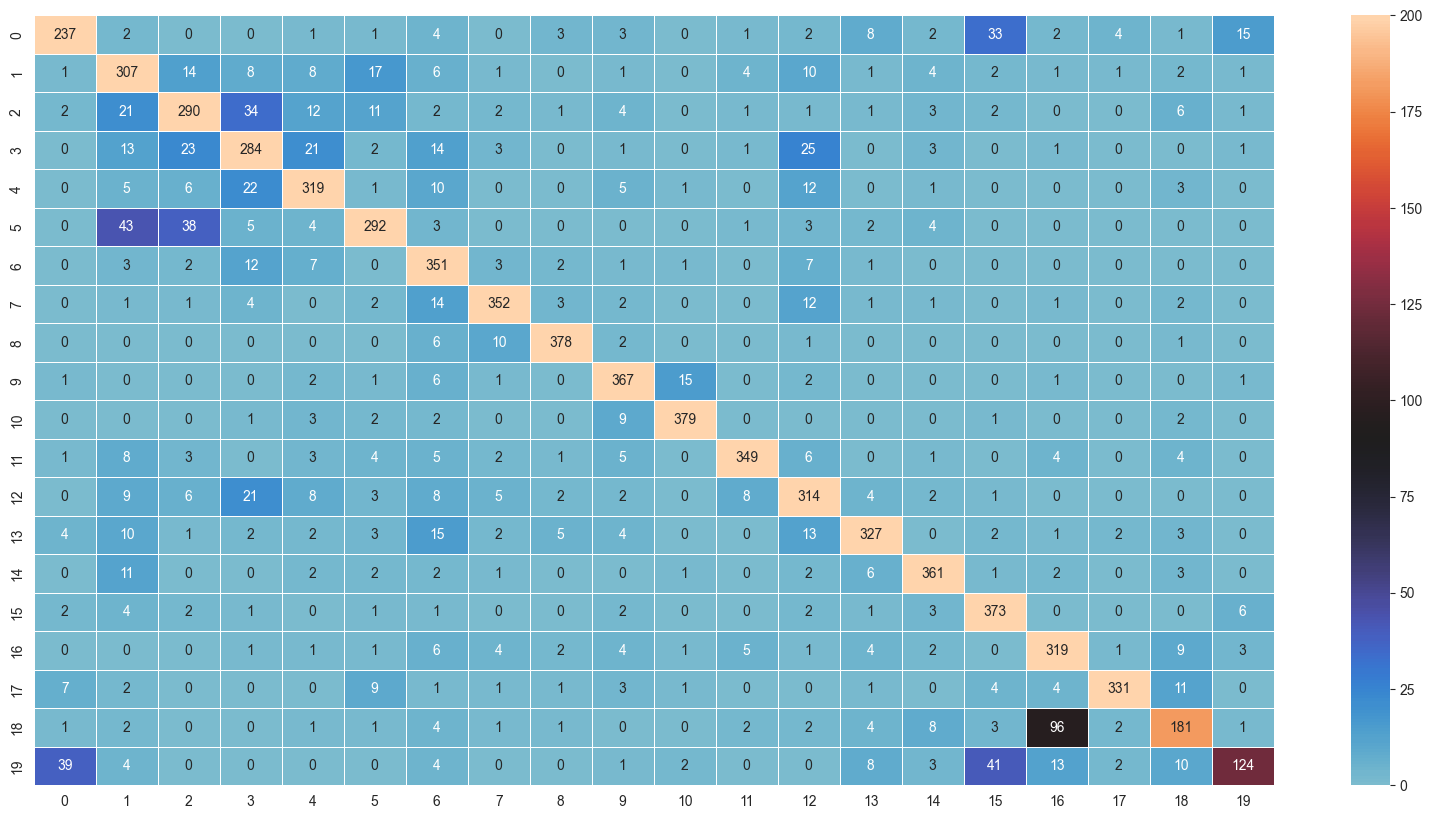

In [7]:
# VISUALIZACIÓN DE LA MATRIZ DE CONFUSIÓN
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
ax = sns.heatmap(cf, annot=True, fmt='d', linewidths=.5, center=90, vmax=200)

# plt.show()

In [8]:
# Listado de las Clasificadas correctamente
correct = np.where(lr_predicted == twenty_test.target)
print(f'Clasificadas correctamente: {len(correct[0])}')

Clasificadas correctamente: 6235


In [9]:
# Listado de las Clasificadas incorrectamente
incorrect = np.where(lr_predicted != twenty_test.target)
print(f'Clasificadas incorrectamente: {len(incorrect[0])}')

Clasificadas incorrectamente: 1297
